In [1]:
∑ᵢᵏ = sum
MA(V)= ∑ᵢᵏ(V)/length(V)
SMA(V, P) = [ K>=P && 0<P<=length(V) ? MA(V[K-P+1:K]) : missing for K ∈ 1:length(V)]

SMA (generic function with 1 method)

In [2]:
using Statistics
BB(V,P,δ) = begin
    n = length(V)
    σ(v) = √(∑ᵢᵏ((v .- MA(v)).^2) / (length(v) - 1))
    μₙ = SMA(V,P)
    σₙ = [K>=P && 0<P<=n ? σ((V[K-P+1:K])) : missing for K ∈ 1:n]
    
    bh = μₙ .+ δ.*σₙ
    bl = μₙ .- δ.*σₙ
    (bh,μₙ,bl)
end

BB (generic function with 1 method)

In [3]:
BB([1,2,3,4,5,6,7,8,9],3,2)

(Union{Missing, Float64}[missing, missing, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], Union{Missing, Float64}[missing, missing, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], Union{Missing, Float64}[missing, missing, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])

In [4]:
using Plots, TimeSeries

In [5]:
plotly()

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/konira/.julia/packages/Plots/lW9ll/src/backends.jl:318


Plots.PlotlyBackend()

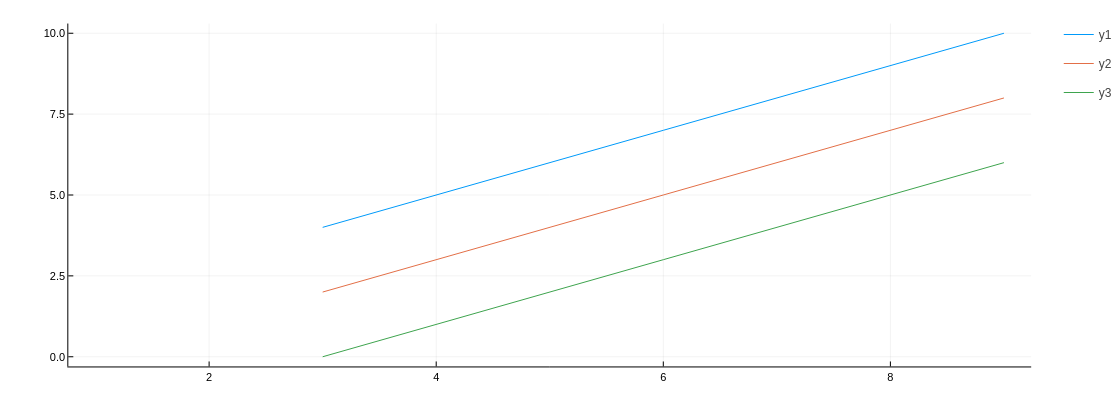

In [6]:
(a,b,c) =BB([1,2,3,4,5,6,7,8,9],3,2)
plot(a)
plot!(b)
plot!(c)

In [7]:
using PyCall
@pyimport vectorbt as vbt
dados = vbt.BinanceData.download("MATICUSDT", start="2021-06-01",interval="1d").get()

/home/konira/.local/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
2021-06-01 03:00:00+00:00 - 2022-09-03 00:00:00+00:00: : 1it [00:01,  1.07s/it]


,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2021-06-02 00:00:00+00:00,1.82492,1.89000,1.74960,1.79960,363997932.6,2021-06-02 23:59:59.999000+00:00,6.611900e+08,893471,183290035.3,3.331158e+08
2021-06-03 00:00:00+00:00,1.79913,1.88500,1.76100,1.82434,311112075.6,2021-06-03 23:59:59.999000+00:00,5.662564e+08,783839,155370734.3,2.829425e+08
2021-06-04 00:00:00+00:00,1.82434,1.82500,1.55009,1.63024,533838609.6,2021-06-04 23:59:59.999000+00:00,8.795828e+08,1469011,265011708.4,4.362556e+08
2021-06-05 00:00:00+00:00,1.63126,1.69700,1.44138,1.52665,335352372.9,2021-06-05 23:59:59.999000+00:00,5.346605e+08,866649,158856661.4,2.534835e+08
2021-06-06 00:00:00+00:00,1.52723,1.59126,1.51090,1.58189,218352782.3,2021-06-06 23:59:59.999000+00:00,3.393966e+08,541268,108572368.5,1.687998e+08
...,...,...,...,...,...,...,...,...,...,...
2022-08-30 00:00:00+00:00,0.81650,0.84410,0.78270,0.81530,85386455.6,2022-08-30 23:59:59.999000+00:00,6.964019e+07,204794,43733889.7,3.568159e+07
2022-08-31 00:00:00+00:00,0.81530,0.85670,0.81530,0.83230,80353318.7,2022-08-31 23:59:59.999000+00:00,6.692875e+07,214619,42434665.4,3.533760e+07
2022-09-01 00:00:00+00:00,0.83220,0.89560,0.82180,0.88440,108922083.8,2022-09-01 23:59:59.999000+00:00,9.284814e+07,269589,55467217.3,4.732600e+07


In [8]:
using DataFrames

In [9]:
matic = DataFrame(timestamp=dados.index .|> c->c ,Close=dados.Close .|> c->c ,Open=dados.Open .|> c->c ,High=dados.High .|> c->c,Low=dados.Low .|> c->c)

,timestamp,Close,Open,High,Low
,DateTime,Float64,Float64,Float64,Float64
1,2021-06-02T00:00:00,1.7996,1.82492,1.89,1.7496
2,2021-06-03T00:00:00,1.82434,1.79913,1.885,1.761
3,2021-06-04T00:00:00,1.63024,1.82434,1.825,1.55009
4,2021-06-05T00:00:00,1.52665,1.63126,1.697,1.44138
5,2021-06-06T00:00:00,1.58189,1.52723,1.59126,1.5109
6,2021-06-07T00:00:00,1.48478,1.58158,1.728,1.456
7,2021-06-08T00:00:00,1.47931,1.48529,1.52408,1.27644
8,2021-06-09T00:00:00,1.49033,1.47934,1.53379,1.35222
9,2021-06-10T00:00:00,1.36286,1.49032,1.4999,1.35222


In [10]:
(bh,μ,bl) = BB(matic.Close,20,2)

(Union{Missing, Float64}[missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  1.027423496846814, 1.029808326988557, 1.0276073940039678, 1.0241079094619205, 1.0215283265836692, 1.0126725554804124, 1.0055932771137923, 0.999050542015166, 0.9671353632591565, 0.9387594030967162], Union{Missing, Float64}[missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  0.8861900000000003, 0.8790650000000001, 0.8739600000000001, 0.86699, 0.8632899999999999, 0.8571500000000001, 0.8527099999999999, 0.8502099999999999, 0.842525, 0.83657], Union{Missing, Float64}[missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  0.7449565031531865, 0.7283216730114433, 0.7203126059960322, 0.7098720905380796, 0.7050516734163306, 0.7016274445195878, 0.6998267228862075, 0.7013694579848339, 0.7179146367408434, 0.7343805969032838])

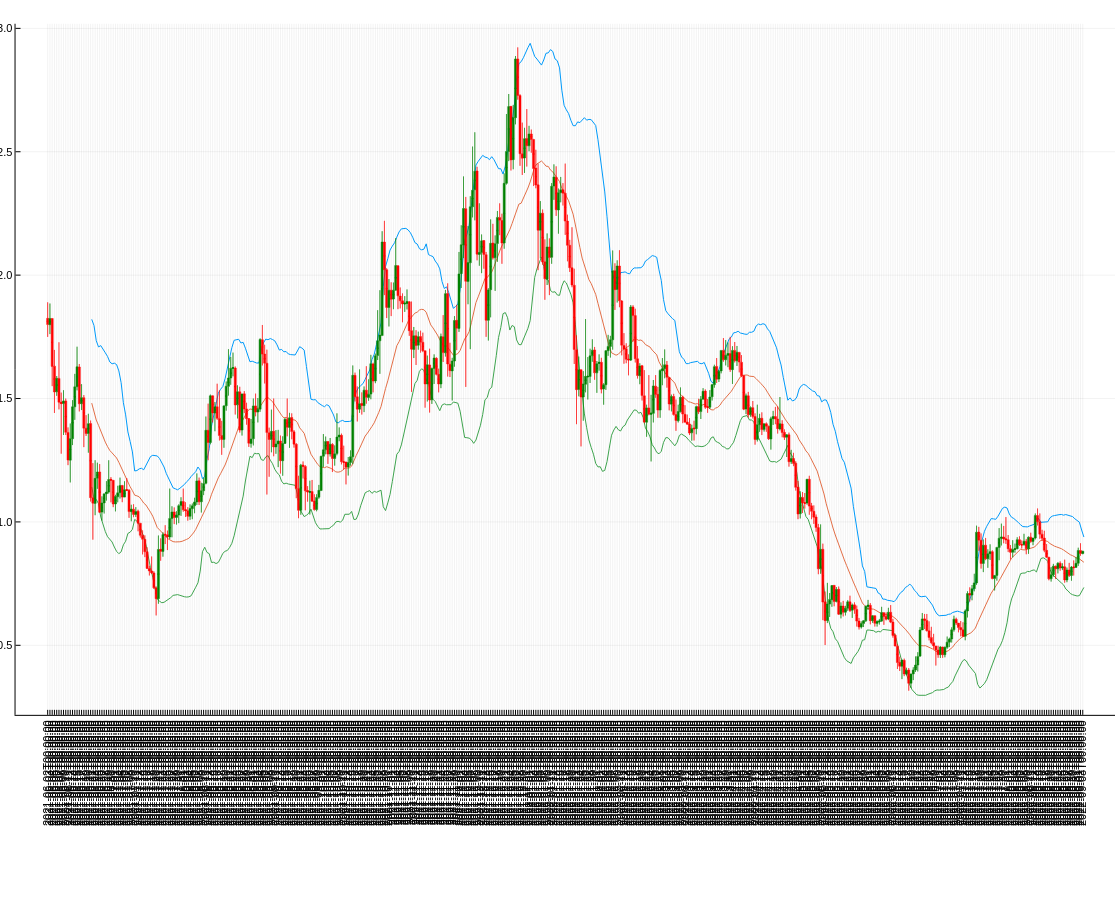

In [11]:

with(:plotly, size=(2200,900)) do
    plot(bh)
    plot!(μ)
    plot!(bl)
    p=plot!(TimeArray(matic, timestamp = :timestamp), seriestype = :candlestick)

end

In [12]:
filter(row -> row.timestamp >= DateTime("2022-09-01T00:00:00"),matic)

,timestamp,Close,Open,High,Low
,DateTime,Float64,Float64,Float64,Float64
1,2022-09-01T00:00:00,0.8844,0.8322,0.8956,0.8218
2,2022-09-02T00:00:00,0.8719,0.8844,0.9136,0.8627
3,2022-09-03T00:00:00,0.8814,0.872,0.8828,0.8687
